In [25]:
import os
import sys
module_path = os.path.abspath('..')
if module_path not in sys.path:
    sys.path.insert(0, module_path)
    
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
mpl.rcParams['font.family']="WenQuanYi Zen Hei"
from matplotlib import pyplot as plt

from pathlib import Path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from data import Dataset

dataset_path = Path('/home/xu/Downloads/object_cxr')

In [6]:
dataset = Dataset(dataset_path/'train', dataset_path/'train.json', dataset_path/'train.csv')

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [12]:
from detnet.utils.visualization import draw_bbox_on_image, draw_train_sample
from data.data_aug import TrainAugmentation, Resize, ToRGB

In [107]:
image_size = 1024
data_aug = TrainAugmentation((image_size, image_size), random_rotate=45, auto_aug=0.5, rand_aug=1)
train_dataset = dataset >> Resize(image_size) >> ToRGB() >> data_aug
print(train_dataset)

TransformedDataset
  len: 8000
  dataset: TransformedDataset
             len: 8000
             dataset: TransformedDataset
                        len: 8000
                        dataset: Dataset
                                   No. of images: 8000
                                   No. of classes: 1
                                   No. of bboxes 8223
                                   Root Location: /home/xu/Downloads/object_cxr/train
                          Transforms: Resize(size=1024)
               Transforms: ToRGB()

    Transforms: TrainAugmentation(TryApply(transform=RandomCrop(min_size=[921.6 921.6], max_size=[1126.4 1126.4], max_aspect_ratio=2, truncate_bbox=True, remove_bbox_outside=True, focus=False), max_trail=5, fallback_origin=True),
                                  Resize(size=(1024, 1024)),
                                  RandomApply(p=0.5,
                                              HorizontalFlip()),
                                  RandomApply(p=0.5

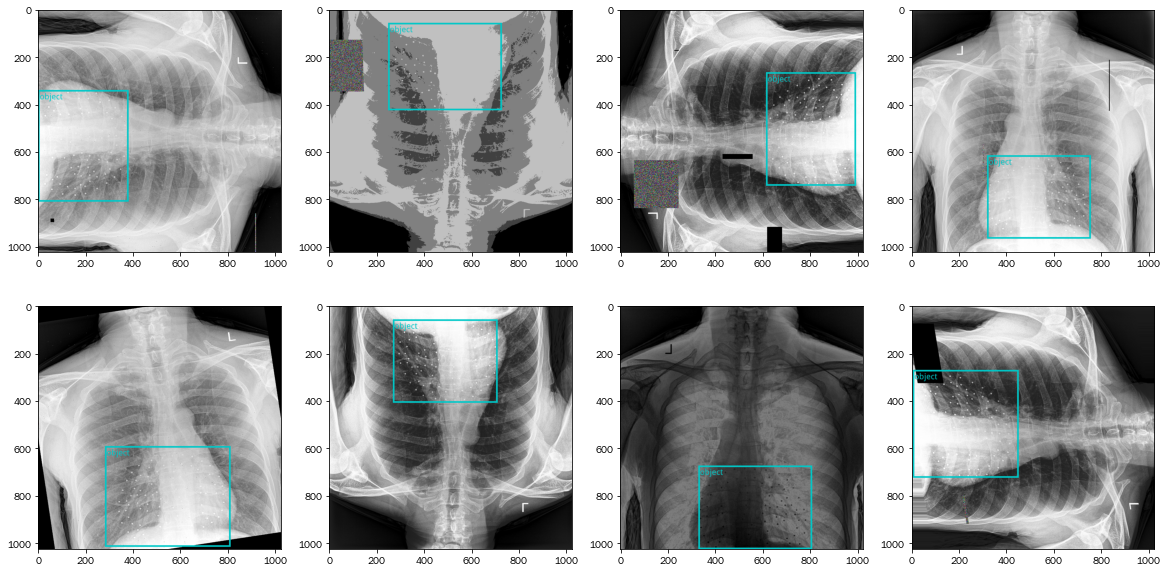

In [112]:
idx = 7

fig = plt.figure(figsize=(20, 10))
for i in range(8):
    sample = train_dataset[idx]
    img = draw_train_sample(sample, train_dataset.classnames)
    plt.subplot(2, 4, i+1)
    plt.imshow(img)